In [105]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [106]:
dim = 256
layers = nn.Sequential(
    nn.Linear(1, dim),
    nn.ReLU(),
    nn.LayerNorm(dim, elementwise_affine=False),
    nn.Linear(dim, dim),
    nn.ReLU(),
    nn.LayerNorm(dim, elementwise_affine=False),
    nn.Linear(dim, 1)
)

In [107]:
weights = [l.weight for l in layers if isinstance(l, nn.Linear)]

Amin, Amax = torch.ones(1), torch.ones(1)
for w in weights:
    Amin = w.clamp(max=0) @ Amin.clamp(min=0) + w.clamp(min=0) @ Amin.clamp(max=0)
    Amax = w.clamp(max=0) @ Amax.clamp(max=0) + w.clamp(min=0) @ Amax.clamp(min=0)
print(Amin.detach(), Amax.detach())

tensor([-3.5235]) tensor([4.2305])


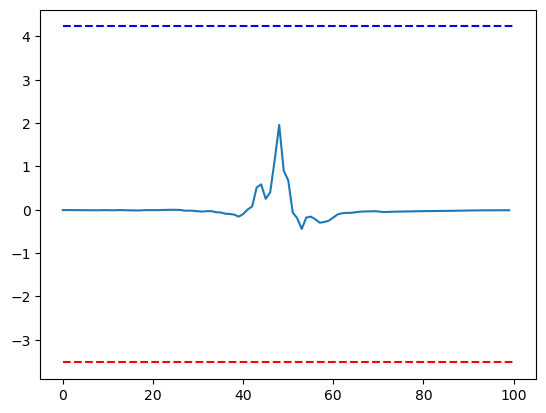

In [108]:
@np.vectorize
def grad(x):
    x = torch.tensor(x, requires_grad=True)
    z = x.float().unsqueeze(-1)
    y = layers(z)
    y.backward()
    return x.grad

g = grad(np.linspace(-10, 10, 100))
plt.plot(g)

plt.hlines(Amin.detach(), 0, 100, 'r', linestyles='dashed')
plt.hlines(Amax.detach(), 0, 100, 'b', linestyles='dashed')